In [9]:
1+1

2

In [10]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [11]:
y_train


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



In [13]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [30]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    horizontal_flip=True  # Random horizontal flipping
)

# Fit the data generator (this learns augmentation parameters)
datagen.fit(x_train) 

# Change your model.fit to use the generator 



In [46]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dropout
from keras.layers import Flatten, Dense,Dropout # Import Flatten here
from keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)  

# Your existing dense layers ...

# Add additional dense layers
x = Dense(512, activation='relu')(x)  # Adjust the number of neurons as needed
x = Dropout(0.5)(x)  # A common dropout rate
x = Dense(256, activation='relu')(x) 

# Output layer (make sure the number of neurons matches your classes)
predictions = Dense(10, activation='softmax')(x) 

model = Model(inputs=base_model.input, outputs=predictions) 

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [48]:
model.fit(datagen.flow(x_train, y_train, batch_size=32), 
          epochs=10, 
          validation_data=(x_test, y_test))

Epoch 1/10


2024-03-12 18:52:28.977682: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1563/1563 [==============================] - 475s 303ms/step - loss: 1.6350 - accuracy: 0.4148 - val_loss: 1.3679 - val_accuracy: 0.5148
Epoch 2/10
1563/1563 [==============================] - 561s 359ms/step - loss: 1.4927 - accuracy: 0.4706 - val_loss: 1.2861 - val_accuracy: 0.5514
Epoch 3/10
 683/1563 [============>.................] - ETA: 3:31 - loss: 1.4568 - accuracy: 0.4832

In [34]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', test_accuracy)


313/313 [==============================] - 56s 177ms/step - loss: 1.1611 - accuracy: 0.5939
Test accuracy: 0.5939000248908997


IndexError: index 10 is out of bounds for axis 0 with size 10

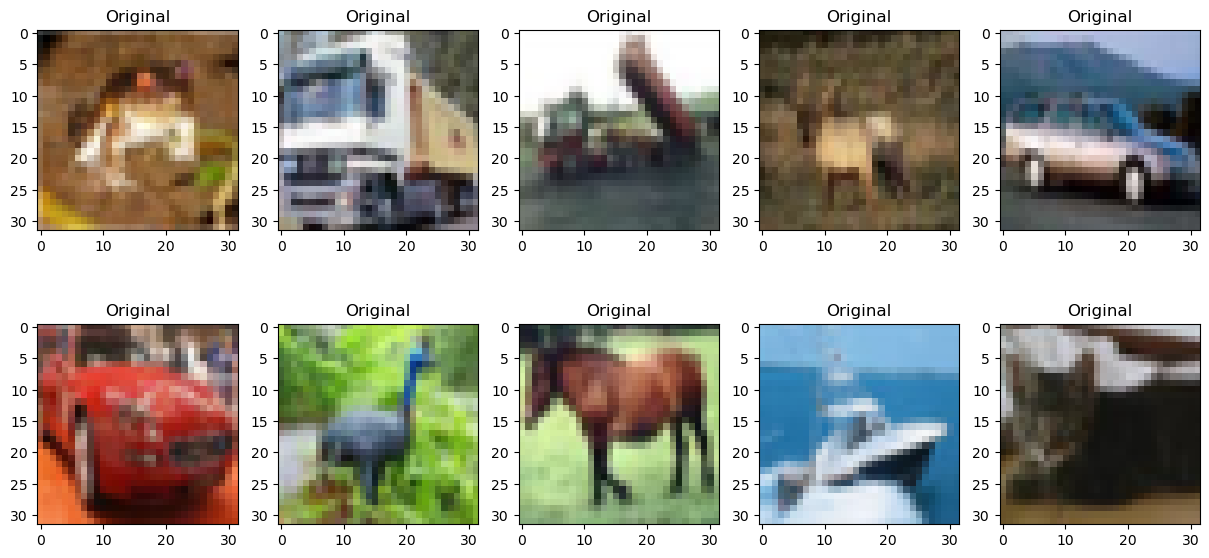

In [28]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# ... (Your ImageDataGenerator setup)

# Get a batch of augmented images (adjust batch size to 10)
x_train_batch, *_ = datagen.flow(x_train, batch_size=10).next()  



# Create subplots in a 2 x 5 grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
axes = axes.flatten()

# Display the original images
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].set_title('Original')

# Display the augmented images
for i in range(10, 20):
    axes[i].imshow(x_train_batch[i - 10])
    axes[i].set_title('Augmented')

plt.tight_layout()
plt.show()
